# Derek Jeter: The Greatest Position Player of All Time?

Derek Jeter is one of the most well-known baseball players ever, and played his entire 20 year career for the New York Yankees. Jeter was a 14 time all star, accured 5 silver slugger awards, 5 gold gloves, and was the 28th memmber of the 3,000 hit club. Most importantly, Jeter was known for his ability to perform in the clutch, helping the Yankees win 5 World Series titles and eventually had his number (2) retired at Yankee stadium.

In total, Jeter ended his illustrious career with 2747 games played, 

After his playing career ended, Jeter was nominated for the Hall of Fame, baseball's most exclusive club that currently holds 235 former players. The Hall fo Fame includes names such as Babe Ruth, Hank Aaron, Cy Young, and many others who are considered to be the best players to ever step foot on a diamond.  To be approved for entry, a player can be inducted in one of two ways. First, a nominated player will be voted on by the The Baseball Writers Association (BBWAA), and at least 75% of the writers must include said player on their ballot for them to be inducted. The other way is the Veterans Committee, which consdiers players who were not originally inducted by the BBWAA, but the committee beleives a mistake was made. 

In Derek Jeter's first year on the Hall of Fame ballot, he was included on 99.7% of the BBWAA's ballots, the highest ever recorded by a position player (non-pitcher) and one vote shy of being unamimous. This is well above the threshold to be inducted, and is a higher percentage than recieved by the likes of Babe Ruth, Hank Aaron, or andyone else. This leads many to believe that Derek Jeter was the greatest position player of all time, since the highest percentage of qualified baseball writers deemed him worthy of induction. 

With this being said, the question we are examining is: 

Did the voters get it right? Was Derek Jeter actually the best position player ever.



To answer this question, we must first ask ourselves: What makes someone a great baseball player. This is somewhat subjective, however we will use the examination techniques used by many MLB scouts when examining a prospective MLB player. There are four major criteria by which a player is judged:

1) Hitting for Contact<br>
2) Hitting for Power<br>
3) Fielding Ability<br>
4) Speed<br>

For someone to be considered the best player ever, we would expect Derek Jeter's stats to be above average in all four of these criteria. However, in this case, "average" should not be the average MLB player during his playing years, he should perform significantly above average among hall of famers as well. Thus, the data we will be examining in our project will compare Jeter's statistics to other Hall of Famers inducted by the BBWAA, since we are examining whether the voters were correct in their analysis of Jeter. 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

# Gathering the Data

For our project, we will use the same resource as used in the Moneyball project, "Lahman's Baseball Database". However, we will use the file from 2020 rather than 2014 so we can make sure all of Jeters stats can be grabbed. Not only does this sqlite database have Jeter's stats, but also has the stats for each player inducted into the Hall of Fame. This is very convienent, as we desire to compare Jeter's stats against other hall of Famers. However, after playing around with the table I notice that Jeter is not included in this Hall of Fame table, so we need to work around that. Each player in the Hall of Fame table contains their own playerID that is unique, and the Hall of Fame Table does not include batting or fielding statistics for the hall of famers.


This is where the batting and fielding tables come in. These tables each contains hitting and fielding statistics for each player for each year from 1871-2020. However, we want to examine each of the players career stats, which is why we must group each of our select statements by player, and take the sum of their yearly statistics. This will give us the total batting and fielding information for a player over his whole career. 

I used similar methods that we used in project 2 to grab the data, using SQL select statements and grouping. When I am grabbing the data from the Hall of Fame table, I include a "WHERE" clasuse because I am only concerned with the players who were inducted into the Hall of Fame by the BBWAA, rather than the Veterans Committee. I also wanted ot make sure I am only including the players who were actually inducted, which is why the "inducted=Y" is included. I will also grab the battlots and votes for each hall of famer, so I can calculate their vote percentage to be compared with Jeter. For the batting and fielding tables, we group by playerID so we can sum all the total statistics for each year for a single player, giving us career statistics. 

In [33]:
# #Grabbing the database file and connecting
sqlite_file = 'lahmansbaseballdb.sqlite'
conn = sqlite3.connect(sqlite_file)

# Selecting the playerID to combine with their statistics in the batting and fiedling tables, along with the votes cast for them. Making sure we only grab the players who were inducted by the BBWAA and not the Veterans Committe. 
HOF_query = 'SELECT playerID,ballots,votes from HallOfFame WHERE votedBy="BBWAA" AND inducted="Y"'

#Getting the carreer batting statistics for every player from 1871-2020, summing all the major hatting categories to get career numbers in each of those areas. Also getting some running (SB) numbers since that is an area that determines how good a plyer is
batting_reg_query = "SELECT playerID,SUM(H) as total_hits, SUM(AB), SUM(HR),SUM([2B]), SUM([3B]),SUM(BB),SUM(HBP), SUM(SB) from Batting GROUP BY playerID"

# Getting career statistics for all the major fielding categories, along with their playerID and position. 
fielding_reg_query = 'SELECT playerID, Pos, SUM(G), SUM(PO), SUM(A), SUM(E) from Fielding GROUP BY playerID'

# # Reading the SQL to create the 3 dataframes
reg_batting = pd.read_sql(batting_reg_query, conn)
reg_fielding = pd.read_sql(fielding_reg_query, conn)
hallOfFame = pd.read_sql(HOF_query,conn)

# Meaning of Batting Terms:


At Bat (AB): When a batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice. 

Homerun (HR): When a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.

Hit (H): When a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice.

Double (2B): When a batter hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner.

Triple (3B): When a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner.

Total Base (TB): The number of bases gained by a batter through his hits. A batter records one total base for a single, two total bases for a double, three total bases for a triple and four total bases for a home run.

Intentional Walk (BB): When the defending team elects to walk a batter on purpose, putting him on first base instead of letting him try to hit.

Hit-By-Pitch (HBP): When a batter is struck by a pitched ball without swinging at it. He is awarded first base as a result. 

Stolen Base (SB): When a baserunner advances by taking a base to which he isn't entitled. 

# Meaning of Fielding Terms:

Position (POS): The position of a player on a team.

Games Played (G): A player is credited with having played a game if he appears in it at any point -- be it as a starter or a replacement. It's important to note that the player doesn't necessarily need an at-bat.

Putout (P): When the fielder physically records the act of completing an out -- whether it be by stepping on the base for a forceout, tagging a runner, catching a batted ball, or catching a third strike.

Assist (A): A fielder who touches the ball before a putout is recorded by another fielder.

Error (E): A fielder is given an error if, in the judgment of the official scorer, he fails to convert an out on a play that an average fielder should have made.

In [34]:
# Creating a new column in the Hall Of Fame dataframe called vointg percentage, so we can see the percentages other great players recieved by the BBWAA in their election process.

hallOfFame['Vote%'] = hallOfFame['votes']/hallOfFame['ballots'] * 100
# # Grab the voting percentage of each hall of famer by taking the number of votes,
# # Dividing it by number of ballets, and multiplying by 100.
hallOfFame.drop(['votes','ballots'],axis=1,inplace=True)
# # No longer need the votes or ballots columns, can drop those
hallOfFame

,playerID,Vote%
0,cobbty01,98.230088
1,ruthba01,95.132743
2,wagneho01,95.132743
3,mathech01,90.707965
4,johnswa01,83.628319
...,...,...
118,rodriiv01,76.018100
119,jonesch06,97.156398
120,guerrvl01,92.890995
121,thomeji01,89.810427


# Combining the Data 

Now that we have three dataframes (Hitting, Fielding, and Hall of Famers) and each datafram contains a primary key (playerID), we want to merge these dataframes together to get the hitting and fielding career only for Hall of Famers, since that is who we are comparing Jeter against (Since Hall Of Famers are considered the best players fo all time). So, we first perform an inner join of the fielding and hitting stat dataframes to get the overall player statistics, and only keep the entries that have playerID codes in both the hitting and fielding tables. 

We call this datafame reg_stats, and then perform another inner join on the reg_stats and hall of fame Dataframe. We once again only keep the entries that have playerID keys in both tables, as that will give us the career stats of all the Hall of Fame players.

However, as I stated previously, Derek Jeter was not included in the Hall of Fame table due to his recent induction, so we create a mini dataframe called jeter that contains the reg_stats of Derek Jeter. Once we have merged the reg_stats and Hall of Fame dataframes, we can simply append the Jeter Dataframe to add him to the list of Hall of Famers, with his career stats. our final dataframe, that contains the career hitting and fielding statistics of all the Hall of Famers (and Derek Jeter) is called reg_HOF_stats.

* As we merge, we are renaming the columns to make them easier to distinguish


In [35]:
reg_stats = pd.merge(reg_fielding,reg_batting, on=['playerID'])
reg_stats.columns = ['playerID','POS','GP','PO','A','E','H','AB','HR','DBL','TPL','BB','HBP','SB']
reg_stats

# # Merge the fielding and batting statistics into one dataframe, grouped by player. 
# # Allows for comprehensive statistics on individual players

,playerID,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,aardsda01,P,331,11,29,3.0,0,4,0,0,0,0,0.0,0.0
1,aaronha01,OF,3020,7436,429,144.0,3771,12364,755,624,98,1402,32.0,240.0
2,aaronto01,1B,387,1317,113,22.0,216,944,13,42,6,86,0.0,9.0
3,aasedo01,P,448,67,135,13.0,0,5,0,0,0,0,0.0,0.0
4,abadan01,1B,9,37,1,1.0,2,21,0,0,0,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19486,zupofr01,C,13,31,1,2.0,3,18,0,1,0,2,0.0,0.0
19487,zuvelpa01,SS,201,267,415,23.0,109,491,2,17,2,34,2.0,2.0
19488,zuverge01,P,265,45,145,7.0,21,142,0,2,1,9,0.0,0.0
19489,zwilldu01,OF,342,755,37,25.0,364,1280,30,76,15,128,4.0,46.0


In [36]:
jeter = reg_stats.loc[reg_stats['playerID'] == 'jeterde01']
# # Takes only Derek Jeter's stats from the above dataframe.
# Since Derek Jeter is not included within the Hall of fame table, we need to make our own row for Jeter tha includes his accumulated statstics  

In [37]:
reg_HOF_stats = pd.merge(hallOfFame,reg_stats,on='playerID')
reg_HOF_stats

# # Takes the intersect of the players in the MLB HOF and their stats from the above dataframe.

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0
1,ruthba01,95.132743,P,2436,4787,569,179.0,2873,8398,714,506,136,2062,43.0,123.0
2,wagneho01,95.132743,2B,2777,7940,6782,828.0,3420,10439,101,643,252,963,125.0,723.0
3,mathech01,90.707965,P,643,313,1506,57.0,362,1687,7,50,12,116,17.0,20.0
4,johnswa01,83.628319,P,815,292,1352,53.0,547,2324,24,94,41,110,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,rodriiv01,76.018100,C,2436,14922,1233,143.0,2844,9592,311,572,51,513,58.0,127.0
119,jonesch06,97.156398,SS,2405,1771,3581,243.0,2726,8984,468,549,38,1512,18.0,150.0
120,guerrvl01,92.890995,OF,1608,3169,126,125.0,2590,8155,449,477,46,737,103.0,181.0
121,thomeji01,89.810427,3B,1599,9450,1565,137.0,2328,8422,612,451,26,1747,69.0,19.0


In [38]:
reg_HOF_stats = reg_HOF_stats.append(jeter)
# Add Jeter to the HOF stats dataframe, since Jeter was not inducted into it until 2020 and was not included in the Hall of Fame Table

In [39]:
pd.set_option('display.max_rows', 100)

# Performing a Mini Clean of the Data

Since we are only examining whether Derek Jeter was the best position player of all time, we can eliminate all non-position players (Pitchers) from our Dataframe. It is almost impossible to measure up the impact of a pitcher versus a position player in baseball, since they perform such different tasks. Even the best baseball data-science minds cannot figure this one out!

In [40]:
# Grabbing a subset of the dataframe, which is all the non-pitchers, since we only want to compare Jeter against other position players
reg_HOF_stats = reg_HOF_stats[(reg_HOF_stats.POS != 'P')]
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0
2,wagneho01,95.132743,2B,2777,7940,6782,828.0,3420,10439,101,643,252,963,125.0,723.0
5,lajoina01,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,657,163,516,134.0,380.0
6,speaktr01,82.089552,OF,2717,6935,462,224.0,3514,10195,117,792,222,1381,103.0,432.0
9,sislege01,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,425,164,472,48.0,375.0
10,collied01,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,438,187,1499,77.0,741.0
11,keelewi01,75.547445,3B,2104,3170,363,167.0,2932,8591,33,241,145,524,129.0,495.0
12,hornsro01,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,541,169,1038,48.0,135.0
14,friscfr01,84.472050,2B,2296,4918,7170,371.0,2880,9112,105,466,138,728,31.0,419.0
15,cochrmi01,79.503106,C,1452,6414,840,111.0,1652,5169,119,333,64,857,29.0,64.0


# Criteria 1: Hitting for Contact

The first criteria we want to examine is whether Derek Jeter was significantly better at getting hits than all other hall of famers. Obviously, the best hitter is not necesssarily the hitter who accumulates the most hits over his career, since much of that is dependant on how many games he played. The more games played, the more opportunties a plyer had to get a hit. Thus, you would expect to see more hits from a player who got more opportunities to get a hit. In baseball, At-Bats (labeled as AB) in our Dataframe measures exactly that: The number of times the player had to get a hit.

We decided to create a scatterplot with At-Bats on the x-axis and hits on the y-axis. We will plot each of the Hall Of Famers, including Derek Jeter. Since we know there is a linear relationship between the two (more opportunities = more hits) we can run a linear regression to see where Derek Jeter lies in comparison. This is very similar to what we did in project 2, as we are examining the "expected" amount of hits a player should get given the amount At-Bats. If Derek actually was one of the best "hitters" ever, we would expect to see him acurrue many more hits than expected. 

0.2934904646718791 60.2981702289741


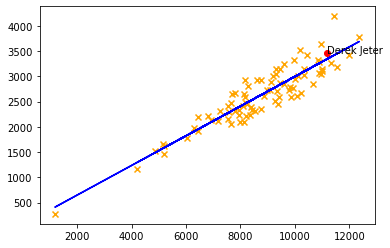

In [41]:
# Making a scatterplot of the 
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['H'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['H']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['H'],c='orange')

x = reg_HOF_stats['AB']
y = reg_HOF_stats['H']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')
print(m,b)

In [42]:
x = pd.DataFrame(reg_HOF_stats['AB'])
y = reg_HOF_stats['H']

reg = linear_model.LinearRegression().fit(x,y)
print(reg.coef_)

[0.29349046]


In [43]:
reg_HOF_stats['PredictedHits'] = reg.predict(x)
reg_HOF_stats['ResidualHits'] = reg_HOF_stats['H'] - reg_HOF_stats['PredictedHits']
reg_HOF_stats.sort_values(by='ResidualHits',ascending=False,inplace=True)
reg_HOF_stats.head(20)

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB,PredictedHits,ResidualHits
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0,3416.655124,772.344876
12,hornsro01,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,541,169,1038,48.0,135.0,2458.995738,471.004262
6,speaktr01,82.089552,OF,2717,6935,462,224.0,3514,10195,117,792,222,1381,103.0,432.0,3052.433458,461.566542
5,lajoina01,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,657,163,516,134.0,380.0,2874.871726,368.128274
99,gwynnto01,97.614679,OF,2326,4512,160,62.0,3141,9288,135,543,85,790,24.0,319.0,2786.237606,354.762394
11,keelewi01,75.547445,3B,2104,3170,363,167.0,2932,8591,33,241,145,524,129.0,495.0,2581.674752,350.325248
38,musiast01,93.235294,OF,2907,12439,818,142.0,3630,10972,475,725,177,1599,53.0,78.0,3280.475549,349.524451
10,collied01,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,438,187,1499,77.0,741.0,2980.234803,334.765197
36,willite01,93.377483,OF,2152,4158,142,113.0,2654,7706,521,525,71,2021,39.0,24.0,2321.935691,332.064309
9,sislege01,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,425,164,472,48.0,375.0,2486.583842,325.416158


<AxesSubplot:ylabel='ResidualHits'>

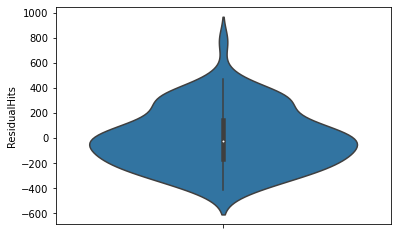

In [44]:
sns.violinplot(y=reg_HOF_stats['ResidualHits'])

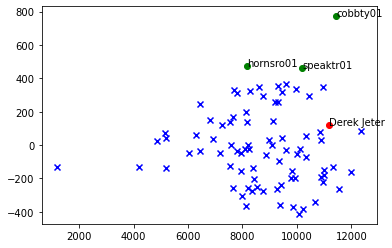

In [45]:
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualHits'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['ResidualHits']))
    elif (v1['ResidualHits'] > 400):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualHits'],c='green')
        plt.annotate(v1['playerID'],(v1['AB'],v1['ResidualHits']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['ResidualHits'],c='blue')

# Criteria 2: Hitting for Power

In [46]:
# Creating a new column in the Dataframe called singles (SGL) since we want to examine 
reg_HOF_stats['SGL'] = reg_HOF_stats['H'] - reg_HOF_stats['DBL'] - reg_HOF_stats['TPL'] - reg_HOF_stats['HR']


reg_HOF_stats['TB'] = reg_HOF_stats['SGL'] + (2*reg_HOF_stats['DBL']) + (3*reg_HOF_stats['TPL'])+(4*reg_HOF_stats['HR']) + reg_HOF_stats['BB'] + reg_HOF_stats['HBP']


reg_HOF_stats.drop(['SGL','DBL','TPL','BB','HBP'],axis=1,inplace=True)

cobbty01: Ty Cobb
hornsro01: Roger Horsnby
cobbTy01: Ty Cobb

Text(0, 0.5, 'Total Bases')

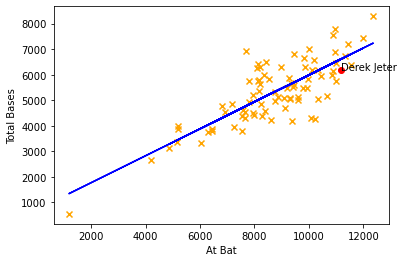

In [47]:
for k2,v2 in reg_HOF_stats.iterrows():
    if (v2['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v2['AB'],y=v2['TB'],c='red')
        plt.annotate('Derek Jeter',(v2['AB'],v2['TB']))
    else:
        plt.scatter(marker='x',x=v2['AB'],y=v2['TB'],c='orange')

x = reg_HOF_stats['AB']
y = reg_HOF_stats['TB']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')
plt.xlabel("At Bat")
plt.ylabel("Total Bases")

In [48]:
x2 = pd.DataFrame(reg_HOF_stats['AB'])
y2 = reg_HOF_stats['TB']

regBases = linear_model.LinearRegression().fit(x2,y2)
print(regBases.coef_, regBases.intercept_)

[0.52724542] 720.4727204024402


In [49]:
reg_HOF_stats['PredictedBases'] = regBases.predict(x2)
reg_HOF_stats['ResidualBases'] = reg_HOF_stats['TB'] - reg_HOF_stats['PredictedBases']

In [50]:
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,896.0,3416.655124,772.344876,7197.0,6750.051386,446.948614
12,hornsro01,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,135.0,2458.995738,471.004262,5798.0,5029.649568,768.350432
6,speaktr01,82.089552,OF,2717,6935,462,224.0,3514,10195,117,432.0,3052.433458,461.566542,6585.0,6095.739815,489.260185
5,lajoina01,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,380.0,2874.871726,368.128274,5122.0,5776.756334,-654.756334
99,gwynnto01,97.614679,OF,2326,4512,160,62.0,3141,9288,135,319.0,2786.237606,354.762394,5073.0,5617.528216,-544.528216
11,keelewi01,75.547445,3B,2104,3170,363,167.0,2932,8591,33,495.0,2581.674752,350.325248,4215.0,5250.038155,-1035.038155
38,musiast01,93.235294,OF,2907,12439,818,142.0,3630,10972,475,78.0,3280.475549,349.524451,7786.0,6505.409509,1280.590491
10,collied01,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,741.0,2980.234803,334.765197,5844.0,5966.037441,-122.037441
36,willite01,93.377483,OF,2152,4158,142,113.0,2654,7706,521,24.0,2321.935691,332.064309,6944.0,4783.425955,2160.574045
9,sislege01,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,375.0,2486.583842,325.416158,4391.0,5079.210638,-688.210638


<AxesSubplot:ylabel='ResidualBases'>

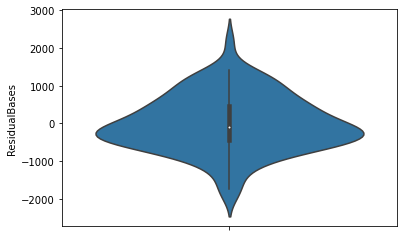

In [51]:
sns.violinplot(y=reg_HOF_stats['ResidualBases'])

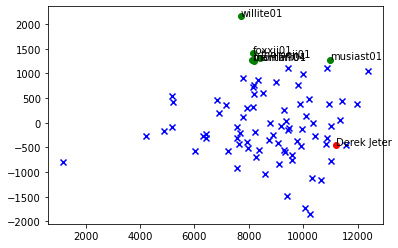

In [52]:
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualBases'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['ResidualBases']))
    elif (v1['ResidualBases'] > 1250):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualBases'],c='green')
        plt.annotate(v1['playerID'],(v1['AB'],v1['ResidualBases']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['ResidualBases'],c='blue')

In [53]:
for i,r in reg_HOF_stats.iterrows():
    if r['playerID'] == 'jeterde01':
        print("Jeter's total hits residual was " +str(r['ResidualHits']) +" and his total Bases residual was " +str(r['ResidualBases']))

Jeter's total hits residual was 119.07607776933901 and his total Bases residual was -449.9852387506353


# Criteria 3: Comparing Jeter's Fielding

The third criteria we will examine is how Derek Jeter's fielding comapres to other fielders. This will be done by first calculating the total outs that each Hall of Famer was repsonsible for. This will be done by combining each player's putouts (Outs he was physocally responsible for) with assists (times he aided in getting the out). We also create another column for fielding percentage, which represents the percentage of times a player recorded an out when he was given a chance (Outs/Outs+Errors). 

To compare Derek Jeter's career fielding against other Hall of Famers, we will create a scatterplot with Games palyed on the x-axis, and total outs on the y-axis. We will then run a linear regression line through the data, adn see where Derek Jeter lies. This is a linear relationship, because the more games a plyer played, the more opportunities he was given to record an out, so we would expect players who have higher games played to have more outs. It is unfair to comapre two palyer's total outs if they did not have similar games played, since we will be penalizing palyers who played less games (not an indicator of true skill). Using our linear model, we can also find an expected number of outs for each Hall of Famer, and create residuals as well. If Derek Jeter truly was an exceptional shortstop fielder, we would expect him to have a higher residual, meaning he collected more outs than expected given his games played. 

In [54]:
reg_HOF_stats['OUTS'] = reg_HOF_stats['PO'] + reg_HOF_stats['A']
reg_HOF_stats['FieldPer'] = reg_HOF_stats['OUTS']/ (reg_HOF_stats['OUTS'] + reg_HOF_stats['E']) * 100
reg_HOF_stats.drop(['PO','A'],axis=1,inplace=True)
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer
0,cobbty01,98.230088,OF,2954,278.0,4189,11436,117,896.0,3416.655124,772.344876,7197.0,6750.051386,446.948614,6917,96.136206
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,2458.995738,471.004262,5798.0,5029.649568,768.350432,11337,95.775957
6,speaktr01,82.089552,OF,2717,224.0,3514,10195,117,432.0,3052.433458,461.566542,6585.0,6095.739815,489.260185,7397,97.060753
5,lajoina01,83.582090,1B,2441,518.0,3243,9590,82,380.0,2874.871726,368.128274,5122.0,5776.756334,-654.756334,15211,96.706720
99,gwynnto01,97.614679,OF,2326,62.0,3141,9288,135,319.0,2786.237606,354.762394,5073.0,5617.528216,-544.528216,4672,98.690325
11,keelewi01,75.547445,3B,2104,167.0,2932,8591,33,495.0,2581.674752,350.325248,4215.0,5250.038155,-1035.038155,3533,95.486486
38,musiast01,93.235294,OF,2907,142.0,3630,10972,475,78.0,3280.475549,349.524451,7786.0,6505.409509,1280.590491,13257,98.940219
10,collied01,77.737226,2B,2701,452.0,3315,9949,47,741.0,2980.234803,334.765197,5844.0,5966.037441,-122.037441,14337,96.943674
36,willite01,93.377483,OF,2152,113.0,2654,7706,521,24.0,2321.935691,332.064309,6944.0,4783.425955,2160.574045,4300,97.439384
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,2486.583842,325.416158,4391.0,5079.210638,-688.210638,20487,98.680218


2.738418402783206 3545.9543153955324


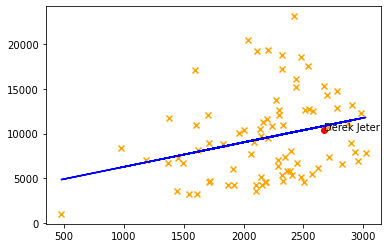

In [55]:
# Making a scatterplot of the 
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['GP'],y=v1['OUTS'],c='red')
        plt.annotate('Derek Jeter',(v1['GP'],v1['OUTS']))
    else:
        plt.scatter(marker='x',x=v1['GP'],y=v1['OUTS'],c='orange')
x = reg_HOF_stats['GP']
y = reg_HOF_stats['OUTS']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')
print(m,b)

# Scatterplot Results

As we can see from the scatterplot above, Derek Jeter falls below the regression line. He is rather far along the x-axis, due to his large amount of games played (2747), however he was not above expected in regards to total outs. After looking at the graph, we want to examine further to make sure a linear relationship exists. The scatterplot does show a general upward trend, and baseball logic tell us that more games played means more opportunities for a player to get outs. Thus, we decidde to use statsmodel to get the p-value of our lineer model. We also create our linear model, and look at our coeffieient to see if it mirrors a linear relationship. We will then use the model to find expected and residual values for each of the hall of famers, putting them in our dataframe. We will also use our residuals to see if the plot is normally distrubted, giving us affirmation that our use of a linear regression was justified. 

The four assumptions we make when we run a linear regression are 

1) That a linear relationship exists

2) Independence of residuals

3) Constant Variance of residuals (this is known as 'Homoscedasticity')

4) That the residuals are normally distributed (this is known as 'Normality')



In [56]:
x = pd.DataFrame(reg_HOF_stats['GP'])
y = reg_HOF_stats['OUTS']


X = sm.add_constant(x)
model = sm.OLS(y, X).fit() 
model.summary()

reg_HOF_stats['PredictedOuts'] = model.predict(X)

reg_HOF_stats['ResidualOuts'] = reg_HOF_stats['OUTS'] - reg_HOF_stats['PredictedOuts']
reg_HOF_stats.sort_values(by='ResidualOuts',ascending=False,inplace=True)
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer,PredictedOuts,ResidualOuts
91,murraed02,85.282258,1B,2422,168.0,3255,11336,504,110.0,3387.306078,-132.306078,6748.0,6697.326843,50.673157,23136,99.279094,10178.403687,12957.596313
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,2486.583842,325.416158,4391.0,5079.210638,-688.210638,20487,98.680218,9121.374183,11365.625817
116,bagweje01,86.199095,1B,2112,129.0,2314,7797,449,202.0,2348.643323,-34.643323,5742.0,4831.405289,910.594711,19251,99.334365,9329.493982,9921.506018
20,foxxji01,79.203540,C,2200,192.0,2646,8134,534,87.0,2447.549610,198.450390,6421.0,5009.086997,1411.913003,19359,99.017953,9570.474802,9788.525198
27,terrybi01,77.380952,1B,1594,139.0,2193,6428,154,56.0,1946.854877,246.145123,3798.0,4109.606304,-311.606304,17110,99.194156,7910.993249,9199.006751
65,mccovwi01,81.411765,1B,2320,256.0,2211,8197,521,26.0,2466.039509,-255.039509,5633.0,5042.303458,590.696542,18803,98.656803,9899.085010,8903.914990
50,bankser01,83.812010,SS,2476,261.0,2583,9421,512,50.0,2825.271838,-242.271838,5539.0,5687.651857,-148.651857,18561,98.613325,10326.278281,8234.721719
73,carewro01,90.519187,2B,2321,260.0,3053,9315,92,353.0,2794.161849,258.838151,5041.0,5631.763842,-590.763842,17219,98.512501,9901.823428,7317.176572
87,perezto01,77.154309,1B,2539,240.0,2732,9778,379,49.0,2930.047934,-198.047934,5500.0,5875.878473,-375.878473,17567,98.652215,10498.798640,7068.201360
118,rodriiv01,76.018100,C,2436,143.0,2844,9592,311,127.0,2875.458707,-31.458707,5022.0,5777.810825,-755.810825,16155,99.122592,10216.741545,5938.258455


In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   OUTS   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     7.008
Date:                Thu, 06 May 2021   Prob (F-statistic):            0.00975
Time:                        23:19:52   Log-Likelihood:                -816.40
No. Observations:                  83   AIC:                             1637.
Df Residuals:                      81   BIC:                             1642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3545.9543   2328.633      1.523      0.132   -1087.294    8179.203
GP             2.7384      1.034      2.647      0.010       0.680       4.797
==============================================================================
Omnibus:                        8.714   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.087
Skew:                           0.810   Prob(JB):                       0.0106
Kurtosis:                       3.017   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Results from our Model and p-value

After running our linear regression and creating our residual column (actual-expected outs), we see from our statsmodel summary that our p-value is .01, which means we can reject our null hypothesis that no relaitonship exists between games played and outs. We can also see from our summary that we have a coefficient of 2.73, which means that every time games played increases by 1, we expect to see an outs increase of 2.73 for a given player. From the scatterplot, the p-value, and the coefficient we can say that a linear relaitonship does exist between games played and outs.


<AxesSubplot:ylabel='ResidualOuts'>

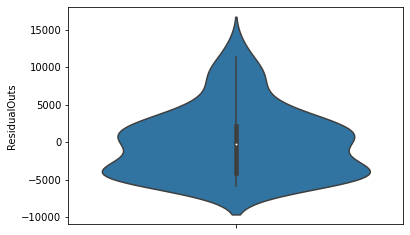

In [58]:
sns.violinplot(y=reg_HOF_stats['ResidualOuts'])

The plot is centered around 0 and somewhat symmetrical, however there are some dips proving that it is not very normally distributed. This may because we are examining all the hall of famers in this plot (regardless of position) even though some positions may have more opportunities during a game to record outs than others. Thus, teh data could be skewed by these players at "high action" positions since they would have higher out totals

# Filtering by Position: A Better Approach?

After some discussion, we realized that comparing Jeter's total outs to all other Hall of Famers may not be the best way to determine his effectiveness as a fielder. The amount of outs a player can record is very dependant on how many times the ball gets hit to his area, which is not evenly distributed in baseball among the positions. Some positions may get the ball hit to their spot more than others, which will skew the amount of outs they will get. It would be unfair to comapre Jeter's outs to other players who recieve more opportunitieis throughout the course of a game. Thus, a better way to determine Jeter's fielding would be to compare his outs against all other players at his position (shortstop), since they are more likely to have similar opportunities per game.

We go about this by grouping the players by position, and performing the same scatterplot as before with only the shortstop group. Although it is a small sample size, we can supplement our previous plot with this new one to get a bettter feel for Jeter's true abilities as a shortstop. We once again run a linear regression trhough this data, since more games played will equal more opportunities, and thus a higher number of total outs. So, we expect there to be a linear relationship between games played and outs recorded. 

7.236469592591715 -6328.821868203592


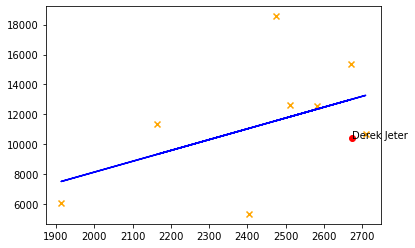

In [61]:
SS_reg_HOF_stats = reg_HOF_stats.groupby(by="POS")
SS = pd.DataFrame(SS_reg_HOF_stats.get_group('SS'))

# Making a scatterplot of the 
for k1,v1 in SS.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['GP'],y=v1['OUTS'],c='red')
        plt.annotate('Derek Jeter',(v1['GP'],v1['OUTS']))
    else:
        plt.scatter(marker='x',x=v1['GP'],y=v1['OUTS'],c='orange')
x = SS['GP']
y = SS['OUTS']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')
print(m,b)

Although we have now filtered by position, we see that Derek Jeter still falls below the regression line when compared to other Hall of Famers at his position. This means that the total amount of outs he recorded was less than what was expected for a player at his poistion, given the amount of games he played. The data looks relatively linear, although we do have a small sample size which can skew the data because of outliers. We will now run a linerar regression and use this to get the expected outs for each of the Hall of Fame shortstops given their games played. We then will create another column for their residual outs. 

In [62]:
x = pd.DataFrame(SS['GP'])
y = SS['OUTS']


X = sm.add_constant(x)
model = sm.OLS(y, X).fit() 

SS['PredictedOuts'] = model.predict(X)

SS['ResidualOuts'] = SS['OUTS'] - SS['PredictedOuts']
SS.sort_values(by='ResidualOuts',ascending=False,inplace=True)
SS.head(20)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,PredictedHits,ResidualHits,TB,PredictedBases,ResidualBases,OUTS,FieldPer,PredictedOuts,ResidualOuts
50,bankser01,83.812010,SS,2476,261.0,2583,9421,512,50.0,2825.271838,-242.271838,5539.0,5687.651857,-148.651857,18561,98.613325,11588.676843,6972.323157
25,maranra01,82.936508,SS,2670,711.0,2605,10078,28,291.0,3018.095073,-413.095073,4301.0,6034.052100,-1733.052100,15380,95.581381,12992.551944,2387.448056
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,2458.995738,471.004262,5798.0,5029.649568,768.350432,11337,95.775957,9330.898330,2006.101670
90,smithoz01,91.737288,SS,2511,281.0,2460,9396,28,580.0,2817.934576,-357.934576,4189.0,5674.470722,-1485.470722,12624,97.822549,11841.953279,782.046721
60,aparilu01,84.615385,SS,2583,366.0,2677,10230,83,506.0,3062.705624,-385.705624,4267.0,6114.193405,-1847.193405,12564,97.169374,12362.979089,201.020911
18,traynpi01,76.859504,SS,1914,348.0,2416,7559,58,158.0,2278.792593,137.207407,3792.0,4705.920878,-913.920878,6062,94.570983,7521.780932,-1459.780932
85,yountro01,77.464789,SS,2709,305.0,3142,11008,251,271.0,3291.041205,-149.041205,5744.0,6524.390345,-780.390345,10705,97.229791,13274.774258,-2569.774258
8630,jeterde01,NaN,SS,2674,254.0,3465,11195,260,358.0,3345.923922,119.076078,6173.0,6622.985239,-449.985239,10425,97.621500,13021.497822,-2596.497822
119,jonesch06,97.156398,SS,2405,243.0,2726,8984,468,150.0,2697.016505,28.983495,6285.0,5457.245607,827.754393,5352,95.656836,11074.887502,-5722.887502


We sorted our dataframe by the residual outs in descending outs, and noticed that Jeter had the second lowest residual outs among HOF shortstops (-2596.49). This means he recorded 2596.49 less outs than expected given the amount of games he played. We also see from our linear regression that the coefficient is 7.236, which was much higher than the overall (not position filtered). This means that for each increase in games played, on average, a HOF shortstops outs increase by 7.23. This shows that shortsotp is actually one of the higher-action positions, so Derek Jeter was in fact given more opportunities per game than the average player due to his position.

After comparing Jeter's fielding agsint all palyers, adn then just players at his position, he has performed below-expected in terms of getting outs (fileding) when compared to Hall of Fame palyers, since he fell below the regression line on both scatter plots. This does not help his case of being the best position player of all time...

<AxesSubplot:ylabel='ResidualOuts'>

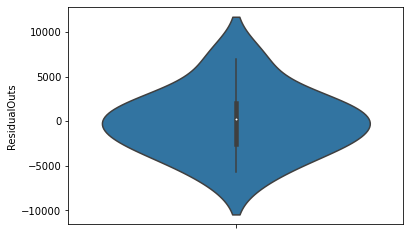

In [34]:
sns.violinplot(y=SS['ResidualOuts'])